<a href="https://colab.research.google.com/github/gabsgt/wine-quality/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective
Classify wine based on their quality.

### Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Load datasets

In [5]:
url_data = '/content/drive/MyDrive/Profissional & Estudos/Datasets/Wine Quality/winequality-red.csv'
data_red = pd.read_csv(url_data, sep=';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
url_data = '/content/drive/MyDrive/Profissional & Estudos/Datasets/Wine Quality/winequality-white.csv'
data_white = pd.read_csv(url_data, sep=';')
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### EDA

In [7]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


No null values found. Good.

In [9]:
data_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
data_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Let's look for outliers.

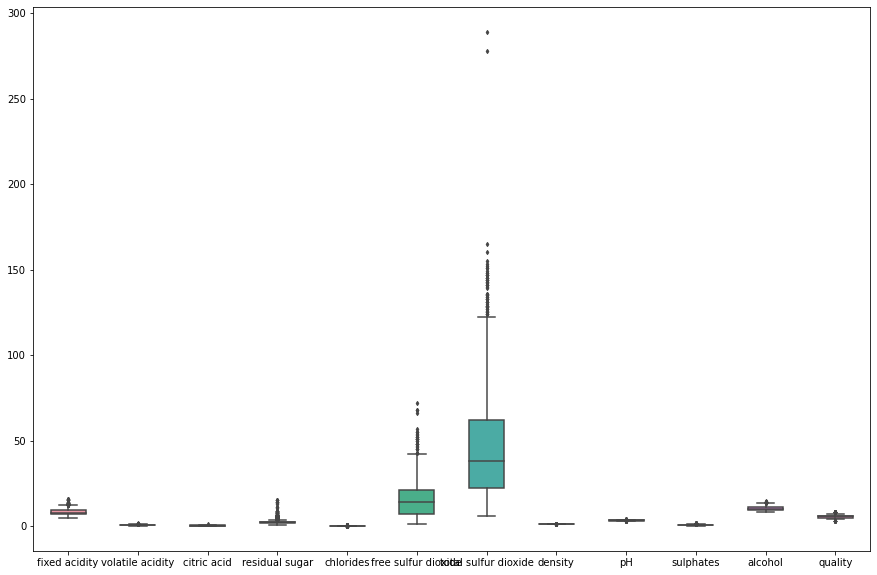

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_red, width= 0.5,ax=ax,  fliersize=3)

Outliers identified in 'total sulfur dioxide' variable.

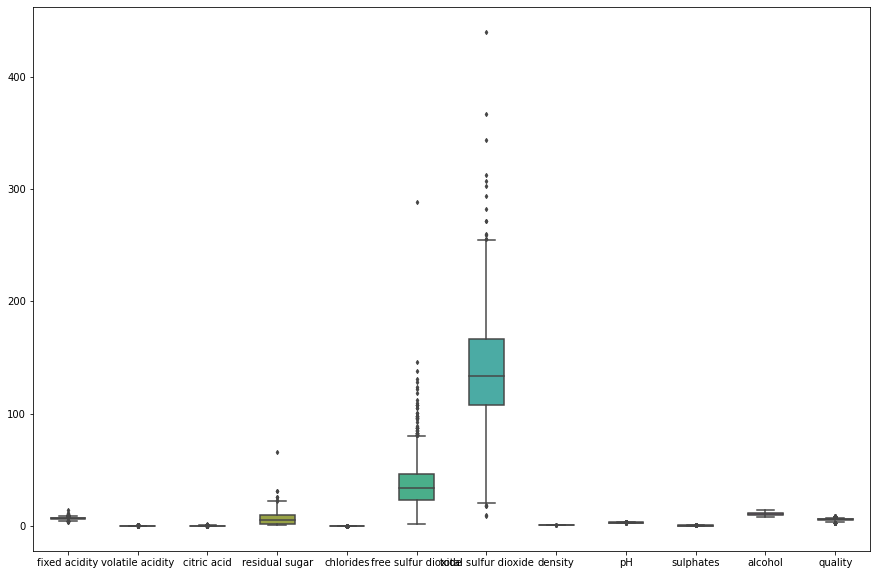

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_white, width= 0.5,ax=ax,  fliersize=3)

Looks like white wines have more outliers. Spotted in 'total sulfur dioxide', 'free sulfur dioxide', and 'residual sugar' variables.

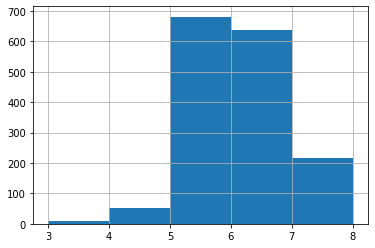

In [15]:
data_red['quality'].hist(bins=5)

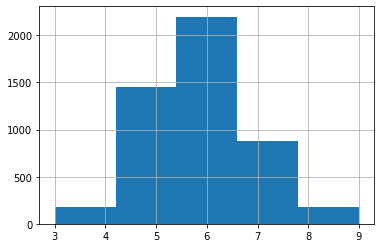

In [18]:
data_white['quality'].hist(bins=5)

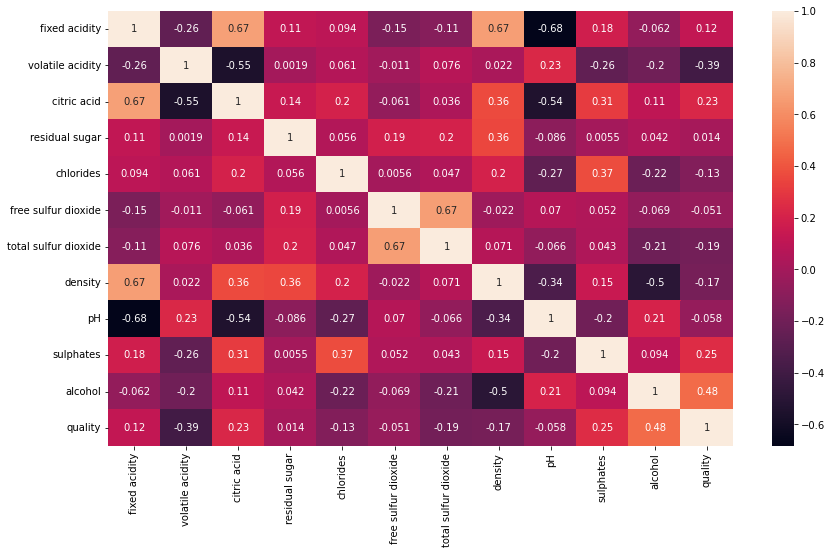

In [30]:
corr = data_red.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True)
plt.show()

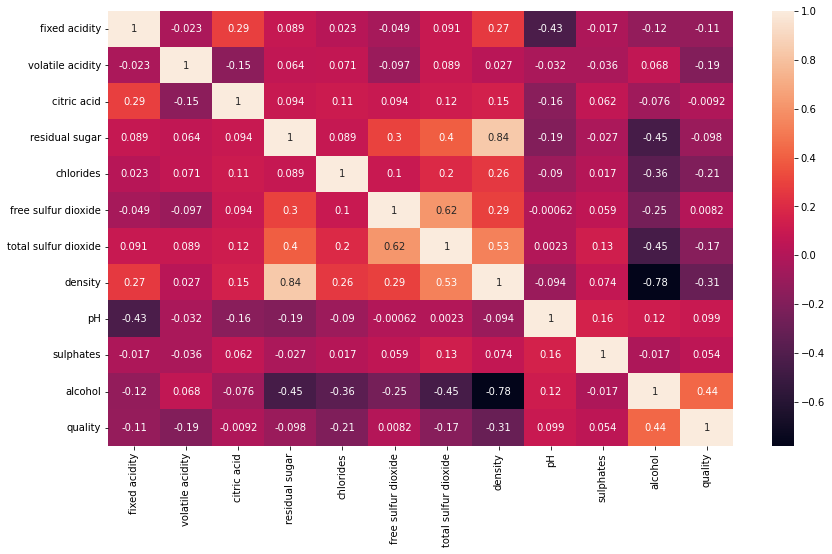

In [31]:
corr = data_white.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True)
plt.show()

Our data is unbalanced. Let's normalize them.

In [35]:
scaler = StandardScaler()
scaled_red = pd.DataFrame(scaler.fit_transform(data_red), columns=data_red.columns)
scaled_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [36]:
scaler = StandardScaler()
scaled_white = pd.DataFrame(scaler.fit_transform(data_white), columns=data_white.columns)
scaled_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.137870
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.137870
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.137870
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.137870
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-0.991374
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.137870
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,1.267114


### PCA

## Red wine

In [40]:
pca = PCA(n_components=0.9)

reduced_data_red = pd.DataFrame(pca.fit_transform(scaled_red))
reduced_data_red

,0,1,2,3,4,5,6,7
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320
...,...,...,...,...,...,...,...,...
1594,-2.241991,0.599594,0.795827,0.441059,-0.312981,0.130820,0.291926,0.137412
1595,-2.122456,-0.370101,2.138539,0.454564,0.104124,-0.751228,-0.436849,0.181539
1596,-1.366265,-0.517561,1.250696,0.514505,0.195916,-0.552162,-0.196039,-0.121154
1597,-2.367147,0.703545,0.899482,0.661956,0.021380,-0.805753,0.126669,0.607400


## White wine


In [41]:
pca = PCA(n_components=0.9)

reduced_data_white = pd.DataFrame(pca.fit_transform(scaled_white))
reduced_data_white

,0,1,2,3,4,5,6,7,8
0,3.543318,-0.355087,-0.325833,-1.735411,-0.400868,-0.891770,0.936900,-0.069991,-0.593900
1,-0.612800,0.289411,0.816434,0.848734,-0.527425,-0.466481,0.215699,0.452790,0.310059
2,0.142394,-1.168021,-0.153068,0.190920,-0.306209,-0.493458,0.184178,0.566042,1.113311
3,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498
4,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498
...,...,...,...,...,...,...,...,...,...
4893,-2.075943,0.322175,0.108275,0.443837,-0.755969,-0.280647,-0.163147,-0.073721,-0.261058
4894,1.479426,0.406234,0.353999,-0.144866,0.163807,0.828166,-0.712011,0.201921,-0.603735
4895,-0.751632,-0.511206,0.615696,-0.250844,-0.807127,0.138658,-0.380348,-1.560692,-0.551499
4896,-3.622997,0.939777,0.002756,-0.845937,-0.186136,0.491603,0.316834,0.909011,-0.093869


### Choosing number of clusters

## Red wine

In [47]:
max_clusters = 12
kmeans_tests = [KMeans(n_clusters=i, init='k-means++',random_state=40) for i in range(1, max_clusters)]
inertias_red = [kmeans_tests[i].fit(reduced_data_red).inertia_ for i in range(len(kmeans_tests))]

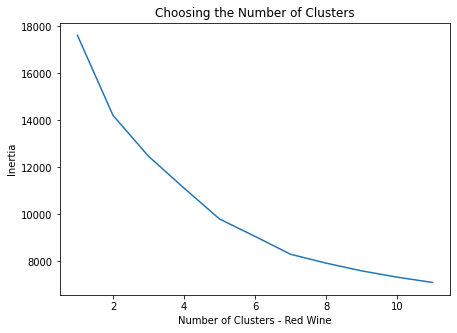

In [48]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias_red)
plt.xlabel("Number of Clusters - Red Wine")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

## White wine

In [50]:
max_clusters = 12
kmeans_tests = [KMeans(n_clusters=i, init='k-means++',random_state=40) for i in range(1, max_clusters)]
inertias_white = [kmeans_tests[i].fit(reduced_data_white).inertia_ for i in range(len(kmeans_tests))]

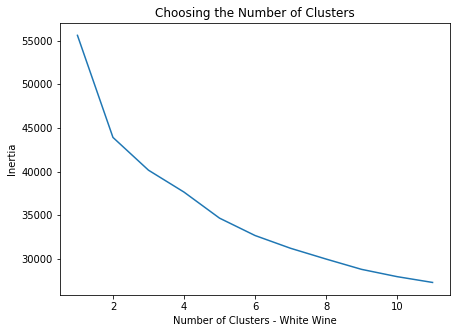

In [52]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias_white)
plt.xlabel("Number of Clusters - White Wine")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

## Finally, let's predict and assign wines to their clusters.

## Red wine

In [54]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 50)
kmeans.fit(reduced_data_red)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [55]:
clusters_r = kmeans.predict(reduced_data_red)
clusters_r

array([3, 3, 3, ..., 0, 3, 0], dtype=int32)

In [56]:
kmeans.cluster_centers_

array([[-0.93020451, -1.75031907,  0.85350007,  0.12908481,  0.06524501,
         0.15171234,  0.0079017 ,  0.04153604],
       [ 0.22711483,  1.53940033,  1.15625315, -0.33780895, -0.34430241,
        -0.007593  ,  0.07645974, -0.01945839],
       [ 2.35425616, -0.54939187, -0.45167556,  0.07338557,  0.08468433,
         0.01427563, -0.039613  ,  0.15183792],
       [-1.14448522,  0.47802107, -0.90052045,  0.07753858,  0.11179711,
        -0.09484555, -0.02431681, -0.11354253]])

In [64]:
reduced_data_red['cluster'] = clusters_r
reduced_data_red

,0,1,2,3,4,5,6,7,cluster
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,3
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,3
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,3
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,2
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,3
...,...,...,...,...,...,...,...,...,...
1594,-2.241991,0.599594,0.795827,0.441059,-0.312981,0.130820,0.291926,0.137412,3
1595,-2.122456,-0.370101,2.138539,0.454564,0.104124,-0.751228,-0.436849,0.181539,0
1596,-1.366265,-0.517561,1.250696,0.514505,0.195916,-0.552162,-0.196039,-0.121154,0
1597,-2.367147,0.703545,0.899482,0.661956,0.021380,-0.805753,0.126669,0.607400,3


## White wine

In [66]:
kmeans.fit(reduced_data_white)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [67]:
clusters_w = kmeans.predict(reduced_data_white)
clusters_w

array([2, 0, 0, ..., 0, 1, 1], dtype=int32)

In [68]:
kmeans.cluster_centers_

array([[-5.35361008e-01, -1.10701944e+00,  4.66723062e-01,
         1.24936276e-01, -6.68746192e-02, -7.39069698e-02,
        -3.90886711e-01, -9.17383801e-02,  1.13090382e-01],
       [-1.64759301e+00,  6.35967069e-01, -3.10790616e-01,
        -1.78781073e-03,  7.52903713e-02,  9.54409455e-03,
         1.75792383e-01,  5.90920890e-02,  1.25142196e-03],
       [ 1.96185556e+00,  2.90490275e-01, -1.37833907e-01,
        -2.86573206e-01,  3.40786215e-02, -1.19567160e-01,
        -3.03183690e-02,  5.68044787e-02, -1.11707021e-01],
       [ 1.83232872e+00, -6.85551079e-01,  1.23529399e+00,
         3.07664580e+00, -9.12279192e-01,  2.75794085e+00,
         2.72106502e+00, -6.94986899e-01,  3.28609997e-01]])

In [70]:
reduced_data_white['cluster'] = clusters_w
reduced_data_white

,0,1,2,3,4,5,6,7,8,cluster
0,3.543318,-0.355087,-0.325833,-1.735411,-0.400868,-0.891770,0.936900,-0.069991,-0.593900,2
1,-0.612800,0.289411,0.816434,0.848734,-0.527425,-0.466481,0.215699,0.452790,0.310059,0
2,0.142394,-1.168021,-0.153068,0.190920,-0.306209,-0.493458,0.184178,0.566042,1.113311,0
3,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498,2
4,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498,2
...,...,...,...,...,...,...,...,...,...,...
4893,-2.075943,0.322175,0.108275,0.443837,-0.755969,-0.280647,-0.163147,-0.073721,-0.261058,1
4894,1.479426,0.406234,0.353999,-0.144866,0.163807,0.828166,-0.712011,0.201921,-0.603735,2
4895,-0.751632,-0.511206,0.615696,-0.250844,-0.807127,0.138658,-0.380348,-1.560692,-0.551499,0
4896,-3.622997,0.939777,0.002756,-0.845937,-0.186136,0.491603,0.316834,0.909011,-0.093869,1
